# Packages

In [ ]:
from google.colab import drive, userdata
from openai import OpenAI
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import os
import json
import time
import requests
import csv



---


# Data

Read Categorical Filipino Online News Dataset (CFODD)

In [ ]:
drive.mount('/content/drive')
dir_path = '/content/drive/MyDrive/4th Year AY 2024-2025/First Semester/CS 198/'
# dir_path = 'D:\\Google Drive\\4th Year AY 2024-2025\\First Semester\\CS 198\\'

dataset_df = pd.read_csv(dir_path + 'CFODD.csv')
dataset_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Headline,Hypothesis/Claims,Premise/Facts,Category,Label,Flip-Flop,Link
0,When did the anti-drugs campaign under Duterte...,"“And so even before I became a President, ther...","Project Double Barrel, the “official” anti-ill...",Politics,FAKE,False,https://verafiles.org/articles/vera-files-fact...
1,When did the anti-drugs campaign under Duterte...,"A day after Duterte become president, the PNP ...","Project Double Barrel, the “official” anti-ill...",Politics,FACT,False,https://verafiles.org/articles/vera-files-fact...
2,Aguirre blasts CHR head: Get your figures right,"Secretary Aguirre hit back at Gascon, question...",the Commission on Human Rights (CHR) cannot fi...,Politics,FAKE,False,https://verafiles.org/articles/vera-files-fact...
3,Is Aguirre correct in saying CHR should file c...,“You (CHR) make a finding and make recommendat...,the Commission on Human Rights (CHR) cannot fi...,Politics,FACT,False,https://verafiles.org/articles/vera-files-fact...
4,Was the UN probe on Duterte and the Davao Deat...,President Rodrigo Duterte said “Investigate me...,"Philip Alston, then the United Nations Special...",Politics,FAKE,False,https://verafiles.org/articles/vera-files-fact...


Read results of Llama models so far

In [ ]:
llama8b_filename = 'Llama3.1-8b Result.csv'
llama405b_filename = 'Llama3.1-405b Result.csv'

In [ ]:
llama8b_df = pd.read_csv(dir_path + llama8b_filename)

print(llama8b_df.info())
llama8b_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   claim_premise          200 non-null    object
 1   labels_array           200 non-null    object
 2   predicted_labels       200 non-null    object
 3   is_correct             200 non-null    bool  
 4   predicted_explanation  200 non-null    object
dtypes: bool(1), object(4)
memory usage: 6.6+ KB
None


,claim_premise,labels_array,predicted_labels,is_correct,predicted_explanation
0,"premise: project double barrel, the “official”...",fake,fake,True,The premise does not provide any information a...
1,"premise: project double barrel, the “official”...",fact,fact,True,"The premise explicitly states that ""project Do..."
2,premise: the commission on human rights (chr) ...,fake,fake,True,The premise clearly states that CHR is an inde...
3,premise: the commission on human rights (chr) ...,fact,fake,False,The premise states that CHR can only assist co...
4,"premise: philip alston, then the united nation...",fake,fake,True,The premise does not support Duterte's claim t...
...,...,...,...,...,...
195,"premise: however, the only ceremonial turnover...",fact,fake,False,The premise does not mention anything about T-...
196,premise: the last known visit of us troops to ...,fake,fake,True,The premise only mentions a visit by US troops...
197,premise: the last known visit of us troops to ...,fact,fake,False,The premise implies that US troops visited Dib...
198,premise: the u.s. navy’s most recent documenta...,fake,fake,True,The premise does not provide any information a...


In [ ]:
llama405b_df = pd.read_csv(dir_path + llama405b_filename)
print(llama405b_df.info())
llama405b_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   claim_premise          200 non-null    object
 1   labels_array           200 non-null    object
 2   predicted_labels       200 non-null    object
 3   is_correct             200 non-null    bool  
 4   predicted_explanation  200 non-null    object
dtypes: bool(1), object(4)
memory usage: 6.6+ KB
None


,claim_premise,labels_array,predicted_labels,is_correct,predicted_explanation
0,"premise: project double barrel, the “official”...",fake,fake,True,"The premise states that Project Double Barrel,..."
1,"premise: project double barrel, the “official”...",fact,fact,True,The premise states that Project Double Barrel ...
2,premise: the commission on human rights (chr) ...,fake,fake,True,The premise states that the CHR cannot file ca...
3,premise: the commission on human rights (chr) ...,fact,fact,True,"The hypothesis is a direct quote from Gascon, ..."
4,"premise: philip alston, then the united nation...",fake,fake,True,The hypothesis is contradicted by the premise....
...,...,...,...,...,...
195,"premise: however, the only ceremonial turnover...",fact,fake,False,The premise states that the only ceremonial tu...
196,premise: the last known visit of us troops to ...,fake,fact,False,The premise mentions the Philippines receiving...
197,premise: the last known visit of us troops to ...,fact,fake,False,The premise states the last known visit of US ...
198,premise: the u.s. navy’s most recent documenta...,fake,fake,True,The premise only mentions a specific visit of ...


Pre-processing. Only using selected columns and dropping entries with null values

In [ ]:
df = dataset_df[['Hypothesis/Claims', 'Premise/Facts', 'Label']].dropna()

print(df.info())
print("\nNumber of NaN values per column:\n", df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Hypothesis/Claims  200 non-null    object
 1   Premise/Facts      200 non-null    object
 2   Label              200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB
None

Number of NaN values per column:
 Hypothesis/Claims    0
Premise/Facts        0
Label                0
dtype: int64


In [ ]:
labels_array = df['Label'].str.lower()
claim_premise_pairs = [f"Premise: {row['Premise/Facts']}\nHypothesis: {row['Hypothesis/Claims']}".lower() for _, row in df.iterrows()]

print("Sample Pair:")
print("Premise: It is raining\nHypothesis: The grass is dry".lower())
pd.DataFrame({'Premise and Claim': claim_premise_pairs, 'Labels': labels_array})

Sample Pair:
premise: it is raining
hypothesis: the grass is dry


,Premise and Claim,Labels
0,"premise: project double barrel, the “official”...",fake
1,"premise: project double barrel, the “official”...",fact
2,premise: the commission on human rights (chr) ...,fake
3,premise: the commission on human rights (chr) ...,fact
4,"premise: philip alston, then the united nation...",fake
...,...,...
195,"premise: however, the only ceremonial turnover...",fact
196,premise: the last known visit of us troops to ...,fake
197,premise: the last known visit of us troops to ...,fact
198,premise: the u.s. navy’s most recent documenta...,fake




---


# Helper Functions

In [ ]:
def metrics(pred_label, true_label):
  label_map = {'fake': 0, 'fact': 1}
  true_numeric = [label_map[label] for label in true_label]
  pred_numeric = [label_map[label] for label in pred_label]

  accuracy = accuracy_score(true_numeric, pred_numeric)
  precision = precision_score(true_numeric, pred_numeric, average='binary')
  recall = recall_score(true_numeric, pred_numeric, average='binary')
  f1 = f1_score(true_numeric, pred_numeric, average='binary')

  print(f"Accuracy: {accuracy:.2f}")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1 Score: {f1:.2f}")

  cm = confusion_matrix(true_label, pred_label, labels=['fake', 'fact'])
  sns.heatmap(cm, annot=True, fmt="d", cbar=False,
              xticklabels=['fake', 'fact'], yticklabels=['fake', 'fact'])
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

In [ ]:
def append_to_csv(df, data, filename):
  if os.path.exists(dir_path + filename):
    with open(dir_path + filename, mode='r', newline='') as file:
      reader = csv.reader(file)
      print(f"New Data: {data}")
      new_row = data
      for i, data in enumerate(reader):
        print(f"{i} {data}")
        if data == new_row:
          print("Row already exists in the CSV file. No new row added.")
          return

    with open(dir_path + filename, mode='a', newline='') as file:
      print("New row added to the CSV file.")
      # writer = csv.writer(file)
      # writer.writerow(new_row)

  else: df.to_csv(dir_path + filename, mode='w', index=False)

In [ ]:
# def details_of(pred_label, pred_explain, true_label):
def details_of(pred_label, true_label):
  correct_predictions = 0
  correct_array = []
  for i in range(len(pred_label)):
      if pred_label[i] == true_label.iloc[i]:
          correct_predictions += 1
          correct_array.append(True)
      elif pred_label[i] == true_label.iloc[i]:
          correct_predictions += 1
          correct_array.append(True)
      else:
          correct_array.append(False)

  metrics(pred_label, true_label)

  # comparison_df = pd.DataFrame({'claim_premise': claim_premise_pairs, 'labels_array': true_label, 'predicted_labels': pred_label, 'is_correct': correct_array, 'predicted_explanation': pred_explain})
  comparison_df = pd.DataFrame({'claim_premise': claim_premise_pairs, 'labels_array': true_label, 'predicted_labels': pred_label, 'is_correct': correct_array})
  # comparison_df.to_csv("/content/drive/MyDrive/4th Year AY 2024-2025/First Semester/CS 198/Llama 3.1 405b Result 2.csv", index=False)
  # comparison_df.to_csv(dir_path + llama405b_filename, index=False)

  return comparison_df

In [ ]:
def generate_response(url, headers, model, content):
  return requests.post(
    url=url,
    headers=headers,
    data=json.dumps({
      "model": model,
      "temperature": 0,
      "options": {"temperature": 0},
      "stream": False,
      "messages": [
        {
          "role": "system",
          "content": "You are an investigator who is an expert at inference. You check if the given premise ENTAILS, CONTRADICTS, or IS NEUTRAL TO the given hypothesis. Base your answer only to the statements given. If your answer is an ENTAILMENT, say 'fact' followed by a short explanation why. If your answer is CONTRADICTION or NEUTRAL, say 'fake' followed by a short explanation why. Use the format '{fact/fake} - {explanation}'.",
        },
        {
          "role": "user",
          "content": content
        }
      ]
    }))




---


# Model Llama 3.1 8B Instruct (Decoder-only Transformer Model)

fake - The premise does not provide any information about the number of killings or arrests before July 1, nor does it suggest that there were attempts to purge everybody before Duterte's inauguration. In fact, it only provides data from July 1 to November 29, which supports Duterte's claim that legitimate operations began after his inauguration.
fact - The premise explicitly states that "project Double Barrel... was launched on July 1, a day after Duterte's inauguration" and that it was launched through a Command Memorandum Circular signed by PNP Chief Ronald de la Rosa himself, which aligns with the hypothesis. Additionally, the premise mentions that page 3 of the document reads: “this cmc will be launched and implemented on the first day of office of the cpnp.”, further supporting the fact that the campaign was indeed launched on July 1.
fake - The premise clearly states that CHR is an independent agency created as a fact-finding and recommendatory body, which means it does not have

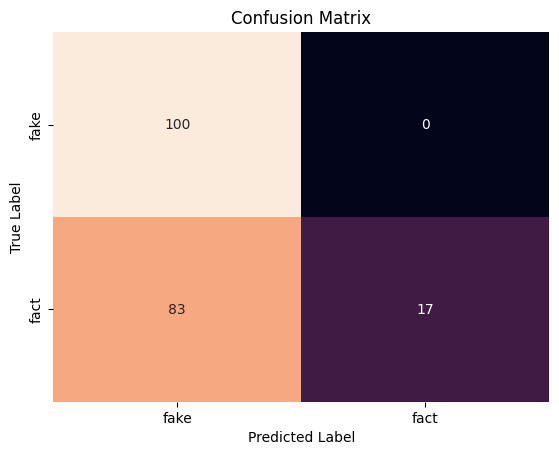

,claim_premise,labels_array,predicted_labels,is_correct,predicted_explanation
0,"premise: project double barrel, the “official”...",fake,fake,True,The premise does not provide any information a...
1,"premise: project double barrel, the “official”...",fact,fact,True,"The premise explicitly states that ""project Do..."
2,premise: the commission on human rights (chr) ...,fake,fake,True,The premise clearly states that CHR is an inde...
3,premise: the commission on human rights (chr) ...,fact,fake,False,The premise states that CHR can only assist co...
4,"premise: philip alston, then the united nation...",fake,fake,True,The premise does not support Duterte's claim t...
...,...,...,...,...,...
195,"premise: however, the only ceremonial turnover...",fact,fake,False,The premise does not mention anything about T-...
196,premise: the last known visit of us troops to ...,fake,fake,True,The premise only mentions a visit by US troops...
197,premise: the last known visit of us troops to ...,fact,fake,False,The premise implies that US troops visited Dib...
198,premise: the u.s. navy’s most recent documenta...,fake,fake,True,The premise does not provide any information a...


In [ ]:
URL = "http://localhost:11434/api/chat"
HEADERS = {"Content-Type": "application/json"}
MODEL = "llama3.1:8b"

label_pred = []
explain_pred = []
for pair in claim_premise_pairs:
  res = generate_response(URL, HEADERS, MODEL, pair)
  print(res.json()['message']['content'])
  label, explanation = res.json()['message']['content'].split(' - ')
  label_pred.append(label.lower())
  explain_pred.append(explanation)

Accuracy: 0.58
Precision: 1.00
Recall: 0.17
F1 Score: 0.29


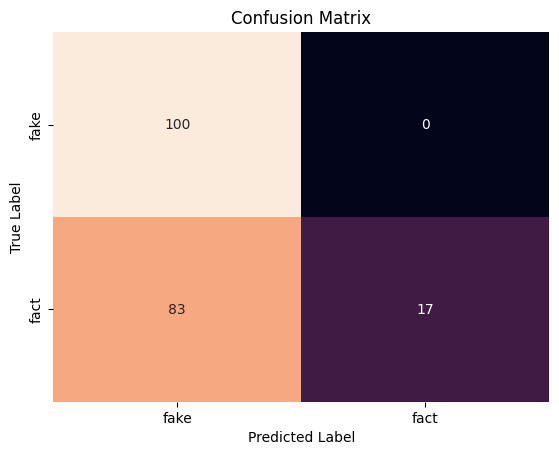

,claim_premise,labels_array,predicted_labels,is_correct
0,"premise: project double barrel, the “official”...",fake,fake,True
1,"premise: project double barrel, the “official”...",fact,fact,True
2,premise: the commission on human rights (chr) ...,fake,fake,True
3,premise: the commission on human rights (chr) ...,fact,fake,False
4,"premise: philip alston, then the united nation...",fake,fake,True
...,...,...,...,...
195,"premise: however, the only ceremonial turnover...",fact,fake,False
196,premise: the last known visit of us troops to ...,fake,fake,True
197,premise: the last known visit of us troops to ...,fact,fake,False
198,premise: the u.s. navy’s most recent documenta...,fake,fake,True


In [ ]:
details_of(llama8b_df['predicted_labels'], labels_array)



---


# Model Llama 3.1 401B Instruct (Decoder-only Transformer Model)

In [ ]:
N_ENTRIES = len(claim_premise_pairs)
FREE_RATE = 40 # requests per minute

URL = "https://openrouter.ai/api/v1/chat/completions"
HEADERS = {"Authorization": f"Bearer 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"}
MODEL = "meta-llama/llama-3.1-405b-instruct:free"


label_pred = []
explain_pred = []
index = len(llama405b_df) + 8
retry_count = 0
while index < N_ENTRIES:
  res = generate_response(URL, HEADERS, MODEL, claim_premise_pairs[index])
  if 'error' not in res.json():
    print(f"{res.json()['choices'][0]['message']['content']}")
    label, explanation = res.json()['choices'][0]['message']['content'].split(' - ')

    entry = [claim_premise_pairs[index], labels_array[index], labels_array[index] == label.lower(), explanation]
    # append_to_csv()
    retry_count = 0

    index += 1
    if (index + 1) % FREE_RATE == 0: time.sleep(50)
  else:
    print(f'retrying...')
    retry_count += 1
    if retry_count == 20: break

  time.sleep(10)

Accuracy: 0.82
Precision: 0.83
Recall: 0.81
F1 Score: 0.82


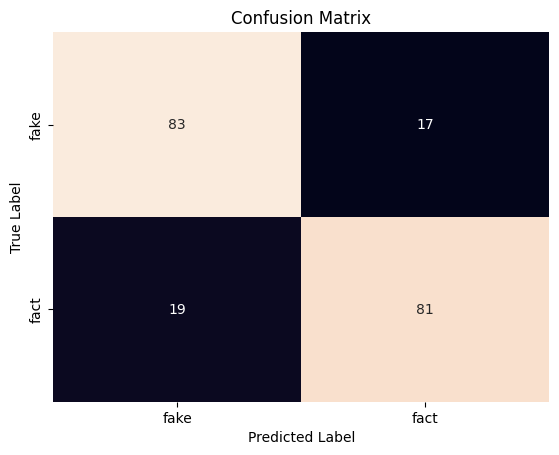

,claim_premise,labels_array,predicted_labels,is_correct,predicted_explanation
0,"premise: project double barrel, the “official”...",fake,fake,True,"The premise states that Project Double Barrel,..."
1,"premise: project double barrel, the “official”...",fact,fact,True,The premise states that Project Double Barrel ...
2,premise: the commission on human rights (chr) ...,fake,fake,True,The premise states that the CHR cannot file ca...
3,premise: the commission on human rights (chr) ...,fact,fact,True,"The hypothesis is a direct quote from Gascon, ..."
4,"premise: philip alston, then the united nation...",fake,fake,True,The hypothesis is contradicted by the premise....
...,...,...,...,...,...
195,"premise: however, the only ceremonial turnover...",fact,fake,False,The premise states that the only ceremonial tu...
196,premise: the last known visit of us troops to ...,fake,fact,False,The premise mentions the Philippines receiving...
197,premise: the last known visit of us troops to ...,fact,fake,False,The premise states the last known visit of US ...
198,premise: the u.s. navy’s most recent documenta...,fake,fake,True,The premise only mentions a specific visit of ...


In [ ]:
details_of(llama405b_df['predicted_labels'], llama405b_df['predicted_explanation'], labels_array)

# Scratch

In [ ]:
RESULT="""fake - The premise states that Willie Ong said he and Liza's only official endorsement is Birch Tree Advance, and that the product Clear Sight Eye Drops is not registered, but it does not explicitly state that Dr. Liza Ramoso-Ong endorses Clear Sight Eye Drops. In fact, the premise implies the opposite, as it mentions that Clear Sight Eye Drops is not their official endorsement.
fake - The premise does not mention Doc Liza Ong mentioning or not mentioning Clear Sight Eye Drops. It only mentions that the product is not registered and that Willie Ong stated their only official endorsement is Birch Tree Advance.
fake - The premise states that the ad consists of spliced videos with AI-generated audio, indicating that Dr. Willie Ong's endorsement of the product is fabricated. Additionally, the premise does not mention Dr. Ong using the product to cure an illness, but rather discusses the importance of regular bowel and urinary movements in the original video.
fact - The premise states that the ad consists of spliced videos with some portions replaced with AI-generated audio to make it seem that Ong mentioned the product, which directly supports the hypothesis that the ad removed parts of Ong's original voice recording and replaced it with AI-generated audio of him promoting the product.
fake - The premise states that the Facebook page "Public Health Malaysia" is not affiliated with the Malaysian Health Ministry or the government, and the Ministry has clarified that statements cited in an article were not issued or authorized by them. This implies that any statement or post from the page, including the one mentioned in the hypothesis, cannot be attributed to the Malaysian government.
fake - The premise does not mention Koreaboo editing its original article. It only mentions the Malaysian Health Ministry clarifying the statements cited in the article were not issued or authorized by the Malaysian government, via its official X account, and quoting the Koreaboo article.
fake - The premise states that the media outlets (ABS-CBN, TV5, and GMA) have news reports on Pulse Asia's September survey, including articles and clips from various episodes, which directly contradicts the hypothesis that they did not report the latest Pulse Asia survey.
fact - The premise states that multiple media outlets (ABS-CBN, TV5, and GMA) reported on Pulse Asia's September survey, which showed Duterte having higher trust ratings than Marcos, contradicting the hypothesis that the media did not report on this survey.
fake - Ayon sa premise, si Pangulong Gloria Macapagal-Arroyo ang pumirma sa National Service Training (NSTP) Act of 2001 noong Enero 2002, na naging dahilan upang maging boluntaryo ang ROTC, hindi si Pangulong Maria Corazon Cojuangco Aquino.
fact - Hindi totoong naging boluntaryo ang ROTC noong termino ni Pangulong Corazon Aquino dahil ayon sa premise, lumipas pa ang mahigit isang dekada bago naging boluntaryo ang ROTC nang pirmahan ni Pangulong Gloria Macapagal-Arroyo noong Enero 2002 ang National Service Training (NSTP) Act of 2001. Ibig sabihin, naging boluntaryo ang ROTC sa termino ni Pangulong Gloria Macapagal-Arroyo, hindi sa termino ni Pangulong Corazon Aquino.
fake - Ang mga wage order na binanggit sa premise (Wage Order No. NCR-23 at Wage Order No. RBVI-26) ay nagpapakita ng ibang mga halaga ng minimum wage sa iba't ibang rehiyon (P570 sa NCR at P450 sa Western Visayas), na hindi tumutugma sa P820 na binanggit sa hypothesis.
fake - Ang premise ay nagpapakita ng mga opisyal na pahayag ng pamahalaan tungkol sa pagtaas ng minimum wage sa National Capital Region (NCR) at Western Visayas, kung saan ayon sa Wage Order No. NCR-23 at RBVI-26, may mga itinakdang halaga para sa minimum na arawang sahod ng mga manggagawa sa iba't ibang sektor. Ito ay salungat sa pahayag na hindi aabot sa ganitong halaga ang inaprubahang umento sa minimum wage.
fake - Ang pahayag ni Guanzon ay hindi direktang tumutukoy kay Leni Robredo bilang hindi well-educated. Sa katunayan, sinabi niya na silang lahat ay "well-educated people" na nagmumula sa "very good families", na hindi nagpapakita ng anumang pagtawag kay Leni Robredo bilang hindi well-educated.
fact - Ang pahayag ni Guanzon ay nagpapakita na siya ay naniniwala na sila ay "well-educated people" at nagmula sa "very good families", na hindi nagpapahiwatig na sinabi niya na "hindi well-educated" si Vice President Leni Robredo.
fake - Ang premise ay hindi nagpapakita ng anumang bilin ni Bro. Eli Soriano tungkol kay Joma, mga kakampink nito, o kung sino-sino ang hindi dapat iboto ng sambayanang Pilipino. Ang premise ay nagpapakita lamang ng pagsagot ni Soriano sa isang estudyante tungkol sa red-tagging at ang pagpapalaya ni dating Pangulong Corazon Aquino kay Sison.
fake - Ang premise ay tungkol sa pagsagot ni Soriano sa isang estudyante patungkol sa red-tagging at binatikos niya ang pagpapalaya ni dating presidente Corazon Aquino kay Sison, ngunit hindi ito nagpapakita ng anumang impormasyon tungkol sa bilin ni Soriano sa kanyang mga tagasunod na huwag iboto ang mga "kakampink".
fake - Ang premise ay nagsasabi na walang magkakatapat na oval sa likod at harap ng balota, ngunit ang hypothesis ay nagsasabi na kailangan pumili ng partylist na hindi tatapat sa president at vice sa harap, na nagpapahiwatig na may mga posisyon na magkakatapat sa likod at harap ng balota. Ito ay salungat sa pahayag na walang magkakatapat na oval.
fact - Dahil walang magkakatapat na oval sa likod at harap ng balota, hindi maaaring tamaan ang pangalan ng ibang kandidato kung babakat ang shade mula sa likuran ng balota.
fake - Ang premise ay nagsasabi na ang electoral protest ni Marcos laban kay Leni ay na-dismiss na ng Korte Suprema dahil hindi niya napatunayan ang mga alegasyon ng pandaraya laban kay Robredo. Ito ay sumasalungat sa hypothesis na si Leni ay isang fake vice president at si Bongbong Marcos ang tunay na nagwagi. Ang premise ay nagpapakita na walang sapat na ebidensiya para suportahan ang mga alegasyon ni Marcos, kaya hindi maaaring sabihin na si Leni ay hindi nagwagi nang patas.
fact - Ayon sa desisyon ng Korte Suprema, bigo si Marcos na magbigay ng mga patunay sa kanyang mga alegasyon ng pandaraya laban kay Robredo, at lumabas pa sa resulta ng manual recount na tumaas ang boto para kay Robredo. Ito ay nagpapakita na walang katibayan ng pandaraya na ginawa ni Robredo laban kay Marcos.
fake - Ang Public Attorney's Office (PAO) ay nasa ilalim ng Department of Justice, na bahagi ng executive branch, hindi judiciary. Kaya, hindi si Leni Robredo ay nakatrabaho sa judiciary bilang abogado ng PAO.
fact - Ang pao ay nakakabit sa department of justice na sakop ng executive branch, kaya hindi ito sakop ng hudikatura (judiciary) na binubuo ng supreme court at lower courts.
fake - The premise states that both Kaka Bag-ao and Leni Robredo were lawyers for the Sumilao farmers, but it does not imply that Leni Robredo was not involved or that Kaka Bag-ao handled the case alone for 20+ years.
fact - Ang pahayag ni Governor Arlene "Kaka" Bag-ao ay nagpapatunay na si Leni Robredo ay naging abogado ng Sumilao farmers, na sinusuportahan din ng pahayag ni Atty. Marlon Manuel na nagsasabi na si Robredo ay isa sa mga abogado na tumulong sa kampanya ng Sumilao farmers.
fact - Ang premise ay nagpapakita na may kaugnayan sa pagitan ng video post at ang artikulo ng The Manila Times pati na rin ang video clip ng interview ni Sotto sa SMNI News noong Marso 17, kaya't ang hypothesis ay nasusuportahan ng premise.
fact - Dahil walang binanggit si Sotto tungkol kay Pangilinan sa buong interview, hindi niya sinabi na paparusahan si Pangilinan kung mapatunayang nakipagsabwatan sa Smartmatic.
fake - Ang premise ay nagsasabi na wala sa anumang bahagi ng interview ni Boy Abunda ang nagpapakitang sinabi ito ng batang Marcos, samantala ang hypothesis ay nagsasabi ng isang direktang quote mula sa batang Marcos na si William Vincent Marcos. Ito ay isang pagkakasalungatan sa pagitan ng premise at hypothesis.
fact - Ang pahayag na "dating nalulong sa droga ang kaniyang ama" ay hindi nabanggit sa interview ni Boy Abunda kay William Vincent Marcos, kaya mali at manipulado ang social media quote card.
fake - The premise states that police officers can seek legal assistance from three government agencies and even hire private lawyers at the government's expense, which directly contradicts President Duterte's statement that the government does not provide lawyers to police who need legal assistance.
fact - The premise states that the secretary of justice, chairman of the commission, or the chief of the PNP may authorize lawyers to provide legal assistance to PNP members facing charges related to their official duty, and also allows for private counsel to be provided at the government's expense, which aligns with the hypothesis that the PNP law directs these agencies to provide free legal assistance to police sued in conducting their duty.
fake - The premise does not support the hypothesis that the rich prefer cocaine and heroin, while the poor prefer shabu. In fact, the premise states that "shabu and marijuana is the preferred drug choice" without any distinction between wealth classes, and that marijuana is the most widely used substance overall. Additionally, the premise notes that the highest prevalence of drug use was found in quintile 2 (not the poorest or richest quintile), which contradicts the hypothesis that the poor are the primary users of shabu.
fact - According to the DDB survey, the highest prevalence of drug use was found in quintile 2, not quintile 1, which represents the poorest. This indicates that it is not the poorest of the poor that is most affected by drugs, contradicting President Rodrigo Duterte's statement.
fake - The premise directly quotes President Rodrigo Duterte saying "my order diyan is shoot to kill kayo" and also mentions a "shoot-on-sight" order for a local official and his son, which contradicts the hypothesis that he never issued a "shoot-to-kill" order against drug suspects.
fact - The statements from Duterte, such as "wala ako pakialam diyan sa human rights" ("I don't care about human rights") and his "shoot to kill" orders, indicate a disregard for human rights principles, which aligns with the UN High Commissioner's statement that Duterte displays a lack of understanding of human rights institutions and principles.
fact - Ang p300 billion na nabayarang utang sa BSP ay bahagi lamang ng domestic debt ng Pilipinas at hindi katumbas ng total outstanding national government debt, kaya maaaring totoo na binayaran ang utang na ito bago umalis si Pangulong Duterte sa kanyang termino.
fact - Ang p300 billion na nabayarang utang ay bahagi lamang ng domestic debt ng Pilipinas, na umabot sa P8.37 trillion nitong Enero, kaya hindi totoong wala nang utang ang Pilipinas.
fact - According to the premise, the revised penal code indeed states that a convict who is not a habitual criminal shall be pardoned at the age of 70 if they have already served out their original sentence or when they complete it after reaching 70, unless their conduct makes them unworthy of clemency. This supports President Duterte's claim that he can be released due to his age, being 71.
fact - The hypothesis is entailed by the premise as it aligns with Article 13 Section 2 of the Revised Penal Code, which states that age is a mitigating circumstance, not a justifying circumstance that exempts a person from criminal liability. Being 70 years old reduces the penalty but does not exempt the person from serving their sentence.
fake - The premise discusses the president's immunity from suit, both within the Philippines and internationally, while the hypothesis is a quote from President Duterte regarding his stance on dealing with criminals and drug addicts, and does not directly relate to the concept of immunity from suit.
fact - The premise states that the International Criminal Court (ICC) can hold the president criminally liable, and the Rome Statute (Article 27) does not recognize immunities or special procedural rules, which supports the hypothesis that state immunity granted to a sitting president is not an effective shield against the ICC.
fact - The premise and hypothesis both mention the same incident where Duterte stated he would "gladly kill" David Bangayan if he caught him smuggling rice in Davao, which De Lima found disturbing and against the rule of law. This shared information confirms that the premise entails the hypothesis.
fact - The premise directly supports the hypothesis as it quotes De Lima saying she finds Duterte's statement "disturbing" and emphasizes the importance of following the "rule of law", but does not mention bringing Duterte to court.
fact - The premise entails the hypothesis because the premise mentions that twelve government and police officials from Iloilo made it to the list of the Philippine National Police's narco-politicians, and the hypothesis specifically lists some individuals from Iloilo who are presumably those officials mentioned in the premise.
fact - According to the premise, Iloilo province ranked 79th and Iloilo city ranked 51st in terms of the number of drug-affected barangays, which does not support the claim that Iloilo is the province or city where the use of shabu is most prevalent.
fake - The hypothesis states that China and Russia have a flat tax system, but the premise contradicts this by stating that China practices progressive taxation, while only Russia has a flat tax rate of 13 percent.
fact - The premise directly states that Russia imposes a flat tax rate of 13 percent on personal income, while China practices progressive taxation, confirming the hypothesis.
fake - Ang premise ay nagsasabi na ang hand sign na ginawa nina Robredo at Pangilinan ay "I love you" na galing sa American Sign Language, samantala ang hypothesis ay nagsasabi na ito ay "devils horn" na isang magkaibang simbolo. Walang koneksyon sa pagitan ng dalawang simbolo, kaya hindi nagtutugma ang premise at hypothesis.
fact - Ang premise ay nagpapakita na ang hand sign na ginawa nina Robredo at Pangilinan ay kumakatawan sa "I love you" sa American Sign Language, na madalas ginagamit para sa deaf and mute community, kaya hindi ito simbolo ng demonyo.
fake - The premise states Indonesia's 2014 national energy policy aims to raise coal's contribution to 30 percent by 2025, and it also mentions that in 2013, petroleum accounted for the highest portion of Indonesia's energy mix at 38 percent. There is no information in the premise that supports Indonesia's energy mix being 80 percent coal.
fact - The premise states that in 2013, petroleum accounted for the highest portion of Indonesia's energy mix at 38 percent, and the goal is to raise coal's contribution to 30 percent by 2025. This information implies that coal does not account for 80 percent of Indonesia's energy mix, supporting the hypothesis.
fake - The premise does not support the hypothesis that criminality, illegal drugs, and poverty are all worsening. According to the premise, poverty incidence decreased from 27.9% in 2012 to 26.3% in 2015. Additionally, some crimes such as murder, homicide, and physical injury cases, as well as crimes versus property, have decreased. While there are some increases in certain crimes, the overall trend is not entirely worsening as stated in the hypothesis. The only clear increase is in drug use, with a 34% rise in admission cases.
fact - The premise provides statistics that support Cayetano being right on the issue of drugs (34% increase in admission cases), wrong on poverty (poverty incidence decreased from 27.9% to 26.3%), and both right and wrong on criminality (some crimes like murder and robbery decreased, while others like rape and homicide increased).
fake - The premise actually states that 15% of the incremental revenue collected from the excise tax on tobacco products will be allocated to programs that support tobacco farmers and workers, such as providing financial support, training, and alternative livelihood projects, which contradicts Marcos' claim that the "sin tax" law has nothing to offer those from the affected industries.
fact - The premise explicitly states that 15% of the incremental revenue collected from the excise tax on tobacco products will be allocated to fund various programs in tobacco-producing provinces, and also provides for special financial support for displaced workers in the alcohol and tobacco industries from 2014 to 2017.
fake - The hypothesis states that wind energy has a potential of 70,000 megawatts and hydro has at least 30,000 megawatts in Mindanao, but the premise reports a wind energy installation capacity target of 2,378 megawatts by 2030 and a potential capacity of pending hydro projects in Mindanao of 2,147.71 megawatts by 2020, which are significantly lower than the stated potentials in the hypothesis.
fact - The hypothesis is supported by the premise as it provides specific government data on renewable energy targets (e.g., solar energy installation capacity target by 2030 is at 285 megawatts; wind, 2,378 megawatts; and hydro, 8,724.1 megawatts) which can be compared to Poe's mentioned numbers to determine if they are indeed "way off".
fact - The hypothesis matches the premise from NEDA data as of Nov. 15, 2015: 1. 112,574 housing units not yet started + 79,219 on-going = 191,793, which is close to 154,000 (discrepancy might be due to ongoing units almost completed) 2. 305 classrooms not yet started + 54 under procurement = 359, which is close to 250 (discrepancy might be due to almost completed procurements or ongoing units not counted) 3. 44,466 coconut areas not yet started hectares is close to 40,000 hectares that need to be replanted.
fake - The premise provides information about the NEDA data as of Nov. 15, 2015, but it does not mention Poe's Yolanda numbers, so there is no basis for comparison to determine if they tally or not.
fact - The hypothesis states that Singapore has 4 million people, which is close to the actual number of residents (3.9 million) mentioned in the premise, and the statement uses this information to make a point about Singapore's defense capabilities.
fake - The premise does not provide any information about Poe's figure, so we cannot determine if her figure was the closest or not.
fake - The premise describes El Niño as a "complex and naturally occurring weather pattern" that occurs every 2-7 years, whereas the hypothesis states that El Niño is climate change. The premise also mentions that the link between climate change and El Niño is uncertain and hard to observe, contradicting the hypothesis' claim that El Niño is equivalent to climate change.
fact - The premise from the Yale University and Columbia University articles describes El Niño as a "complex and naturally occurring weather pattern" that typically occurs every two to seven years, supporting the hypothesis that El Niño is a natural occurrence.
fake - The premise states that before the law (RA 10533) was passed in 2013, the Philippines was one of the three remaining countries in the world with a 10-year pre-university education system, whereas the hypothesis states the Philippines is one of the remaining five countries without a K to 12 education system, which is a contradictory claim.
fact - The premise directly states that before the law was passed, the Philippines was one of the three remaining countries in the world with a 10-year pre-university education system, which supports the hypothesis.
fake - The premise provides data on poverty in Sorsogon and Capiz in 2012, but it does not provide information about the efforts of Mar Roxas and Chiz Escudero to address poverty in their respective home provinces during their time in office. Therefore, it cannot be determined if the accusations made by the candidates are valid or not.
fact - According to the given premise, in 2012, Sorsogon had a higher poverty gap (7.4 vs 5.5), higher severity of poverty (2.5 vs 2), and higher poverty incidence among population (40.7% vs 27.8%) compared to Capiz. Additionally, Sorsogon ranked higher (worse) in all three categories among the 81 provinces. This supports the hypothesis that poverty-wise, Sorsogon is worse off than Capiz, at least for the year 2012. However, since the premise only provides data for 2012, we can infer that if the same trend holds for 2006 and 2009, the hypothesis would be true.
fake - According to the premise, the Philippines was the top coconut producer in the 1960s and 1970s, and ranked second in most years since 1984, which contradicts Senator Poe's statement that the Philippines is the fifth largest coconut producer in the world.
fact - The premise states the Philippines was the top coconut producer for most of the 1960s and 1970s, then ranked second since 1984, which implies the Philippines was never mentioned as the fifth largest coconut producer, making it possible for Sri Lanka to hold that position.
fact - The hypothesis provides direct quotes from Manny Pacquiao that support the premise's claims about his pro-life stance and his efforts to save Mary Jane Veloso from execution, which contrasts with his later push for the reinstatement of the death penalty.
fact - The premise and hypothesis both state that in his first privilege speech as a senator, Manny Pacquiao pushed for the reinstatement of the death penalty, specifically mentioning that it is for heinous crimes such as drug trafficking. The hypothesis provides a direct quote from Pacquiao's speech, which aligns with the information presented in the premise.
fact - The premise and hypothesis both state that President Duterte initially favored a Constitutional Convention (Con-Con) over a Constitutional Assembly (Con-Ass) to revise the constitution, which shows consistency and supports the hypothesis.
fact - The premise and hypothesis both state that President Duterte initially favored a Constitutional Convention (Con-Con) but later changed his mind due to budgetary concerns and a softening toward members of Congress, which is consistent with the information provided in both statements.
fake - The premise does not mention Duterte blaming the United States and other Western countries for importing terrorism, nor does it mention him talking about colonial powers dividing Muslims and Christians. The premise only discusses Duterte's conflicting statements about whether to negotiate with the Abu Sayyaf Group (ASG) or not.
fact - The hypothesis is directly supported by the information in the premise, specifically the quote from Duterte on August 1, where he describes the Abu Sayyaf Group as "criminals" and states that there is no reason for him to sit down and talk with them. This matches the statement in the hypothesis, where Duterte says he will not deal with the Abu Sayyaf Group because they are "criminals" and exhibit "extreme brutality".
fact - Duterte initially mentioned being charged with acts of lasciviousness in his speech to the Rotarians, but later denied it when questioned by Mike Enriquez during the presidential debate, indicating a contradiction in his statements, thus the hypothesis is entailed as it shows Duterte's denial of the charge.
fact - The premise directly states that Duterte mentioned being charged with acts of lasciviousness in his speech to the Rotarians on Jan. 14, which matches the information in the hypothesis.
fake - Ang pahayag na galing sa ABS-CBN ay nakabase sa isang interview kay Sara Duterte, kung saan sinabi niya na patuloy siyang nakatira sa Davao City kahit na nakaupo siya bilang bise presidente. Walang indikasyon na ang balita ay panloloko o pananadya, at walang ebidensiya na ipinakita upang suportahan ang akusasyon na mayroong malisya.
fact - Ang pahayag ni Vice President-elect Sara Duterte-Carpio ay nagpapahiwatig na siya ay mananatili sa Davao City pero magtatrabaho sa Metro Manila, ngunit walang binanggit na magpapabalik-balik siya sakay ng eroplano araw-araw.
Fake - Ang premise ay nagpapaliwanag sa mga kapangyarihan ng pangulo at ng senado sa pagtalaga at pagpatalsik ng mga senador, ngunit hindi ito direktang sumasang-ayon o sumasalungat sa hypothesis na nagsasabing si Gadon ang dapat na maupong senador sa halip na si Cayetano. Ang premise ay nagbibigay ng impormasyon tungkol sa mga kapangyarihan ng pangulo at ng senado, ngunit hindi ito nagbibigay ng dahilan kung bakit si Gadon ang dapat na maupong senador.
fact - Hindi pwede magtanggal ang pangulo ng isang senador sa pwesto at magtalaga ng kapalit nito ayon sa saligang batas. Ang kapangyarihang magpatalsik ng mga miyembro ng senado ay nasa senado lamang, at hindi kasama ang mga senador sa mga posisyon na maaaring italaga ng pangulo.
fake - Ang premise ay nagpapahayag na si Hontiveros ay naiproklama bilang isa sa 12 nanalong senador noong halalan 2022, ngunit hindi ito nagpapakita ng anumang kaugnayan sa kasong isinampa ni Attorney Ferdinand Topacio laban sa kanya.
fact - Ang pahayag na "nakatakdang muling maupo" ay nagpapahiwatig na si Hontiveros ay nakaupo na bilang senador noon at muling manunungkulan, kaya hindi siya natanggal bilang senador.
fake - Ang premise ay nagsasabi na ang batas na nagbigay-daan sa kontraktuwalisasyon ay naipasa noong administrasyon ni dating Pangulong Ferdinand E. Marcos Sr. sa pamamagitan ng Presidential Decree No. 442 o ang Labor Code of the Philippines noong Mayo 1, 1974. Samantala, ang hypothesis ay nagsasabi na si dating Pangulong Maria Corazon Cojuangco Aquino ang nag-approve ng kontraktuwalisasyon, na salungat sa sinabi sa premise.
fact - Ang pahayag ni Atty. Jose Sonny Matula ay sumang-ayon sa premise na walang batas na naipasa noong panahon ni Pangulong Cory Aquino tungkol sa kontraktuwalisasyon, dahil ang batas na nagbigay-daan sa kontraktuwalisasyon ay naipasa noong panahon ni Pangulong Ferdinand E. Marcos Sr. noong Mayo 1, 1974.
fake - Ang premise ay nag-anunsyo ng "Angat Buhay NGO" habang ang hypothesis ay nag-anunsyo ng "Angat Buhay Alliance" kasama ang CPP at NPA, na nagpapakita ng pagkakaiba sa mga organisasyon at layunin.
fact - Ang premise ay nagpapakita na si Robredo ay nag-anunsyo ng pagtatatag ng "Angat Buhay NGO", na isang organisasyon na magpapatuloy sa bolunterismo ng kanyang mga taga-suporta. Ito ay hindi nagpapakita ng anumang koneksyon sa Communist Party of the Philippines o New People's Army, o sa pagtatatag ng isang "new government". Kaya, ang premise ay sumusuporta sa pahayag na walang sinabi si Robredo tungkol sa pagtatatag ng "Angat Buhay Alliance" kasama ang mga grupong ito.
fake - The hypothesis contains phrases not present in the premise ("goodluck na lang sa pilipinas", "goodluck na lang talaga sa pilipinas, goodluck"), and the actual quote from the premise has a different tone and wording, indicating that the hypothesis is not an accurate representation of the premise.
fact - Ang pahayag ni Dr. Jean Encinas-Franco ay nagpapakita na siya ay aktibong faculty pa rin sa University of the Philippines at kasalukuyang nasa sabbatical leave, na sumasalungat sa ideya na siya ay napatalsik.
fake - The premise states that the modernization project of the Davao International Airport was taken back by the implementing agency in February 2023, and the Leyte-Surigao link bridge was marked "for possible delisting" in July 2019 and later confirmed to be no longer pushing through. This contradicts the hypothesis that these projects are part of President Ferdinand Marcos Jr.'s "Build Better More" program.
fact - The premise states that the modernization project of the Davao International Airport was included in NEDA's IFP list only until May 2021 and was later taken back by the implementing agency. Additionally, it mentions that the Leyte-Surigao link bridge was marked "for possible delisting" in 2019 and the then NEDA chief Ernesto Pernia stated that the project would no longer push through due to high costs and challenges. This information supports the hypothesis that the most recent list of IFPs does not include these two projects.
fact - The premise mentions the announcement of the sale of a P500 coin by the BSP in January 2020, which directly supports the hypothesis of a new 500 peso coin.
fact - The premise states that the BSP announced the sale of the P500 coin with an eagle design in January 2020 to celebrate 70 years of central banking and the BSP's 25th anniversary, which supports the hypothesis that the BSP issued P500 coins with an eagle design in 2020 as part of its commemorative currency. Additionally, the premise mentions that the BSP's list of public advisories starting from 2020 does not contain any information about new coins aside from the "New Generation Currency" series, which implies that no such coins were released recently for circulation.
fact - The hypothesis can be inferred from the premise as it provides a specific example of a product endorsement (glutathione collagen gummies) that may be falsely associated with Francisco, which he warned against in his YouTube video.
fact - The premise states that Francisco debunked product endorsements falsely associated with him, including those of another collagen gummy product, and reminded the public to be wary of fake products. This, combined with the information that "glutathione collagen gummies" is not listed by the FDA, supports the hypothesis that Francisco does not endorse the unregistered brand of collagen gummies.
fact - The premise does not directly state the hypothesis, but it provides information that makes the hypothesis plausible. The premise states that Ong only endorses one product, Birch Tree Advance, and that "Fitgum" and its product "Apple Cider Vinegar Gummies" are not registered. This information suggests that Ong would not endorse "Fitgum" products, making it likely that any picture of him with such a product would be doctored.
fact - The premise states that Ong only endorses one product, "Birch Tree Advance", and that "Fitgum" and "Apple Cider Vinegar Gummies" do not have a certificate of product registration. This information supports the hypothesis that Dr. Ong (and possibly Dr. Liza Ong) has been misrepresented as an endorser of the unregistered "Apple Cider Vinegar Gummies".
fake - The premise states that the purchase of the anti-ship missile system happened before Marcos took office in mid-2022, specifically on December 31, 2021, and the contract was for three batteries of the system, but it does not mention the exact number of missiles as 100. Additionally, it does not attribute the purchase to the Marcos administration, but rather to the Department of National Defense before Marcos took office.
fact - The premise states that the purchase happened before Marcos took office in mid-2022, and the contract agreement was signed and notice to proceed was issued in January and February 2022, respectively, which was during the administration of former President Rodrigo Duterte.
fake - The premise states that Kris Aquino commented on Kim Chiu's Instagram post on Jan. 3, indicating that she was alive on that date, which contradicts the hypothesis that she died on the same day.
fact - The premise states that Aquino commented on Kim Chiu's Instagram post on Jan. 3, which directly supports the hypothesis that she is alive and was active on social media, contradicting the rumors of her death.
fake - The premise only mentions that the verified badge is on "Doc Willie Ong's" official page, but the hypothesis mentions it's the official fanpage of "Doc Willie & Lizza Ong". The premise does not confirm Lizza Ong as a co-owner of the page.
fake - The premise is neutral to the hypothesis as it provides information about the authentic page of Doc Willie Ong, but it does not directly relate to or contradict the information about the imposter page.
fake - The premise does not support the hypothesis. In fact, it contradicts the hypothesis as Ong clarified that Birch Tree Advance is the only product he endorses, but the hypothesis is promoting a different product, "Navitas Pure Organic Barley" (implied, as the hypothesis is about organic barley), which is also mentioned in the premise as not having a certificate of product registration with the FDA.
fact - The premise states that Ong only endorses Birch Tree Advance, and the FDA's portal shows that "Navitas Pure Organic Barley" does not have a certificate of product registration. This information supports the hypothesis that the sponsored post was manipulated to make it seem like Ong is endorsing "Navitas Pure Organic Barley", which is not the product he actually endorses.
fake - The premise states that Robredo accepted the results of the election in her "Tayo Ang Liwanag" thanksgiving speech and acknowledged the majority's decision. Although she mentioned questions about the honesty of the election's conduct and reports of irregularities, she did not explicitly state that the election was not clean, honest, or transparent, nor did she say that she never conceded the election. This directly contradicts the claim made in the hypothesis.
fact - The premise states that Robredo accepted the results of the election in her "Tayo Ang Liwanag" thanksgiving speech, but also mentioned that her team was monitoring allegations and consulting with experts regarding the honesty of the election's conduct. However, it does not indicate that she denied conceding the election. Instead, her speeches show that she acknowledged the results while expressing disappointment and concerns about reported irregularities. This implies that any quote claiming she denied conceding the election would be fabricated.
fake - The premise states that NAIA was no longer included in the global list of worst airports in 2015 after multiple renovations and improvements led by the Department of Transportation and Communications under Aquino's presidency, and it also improved in 2018 as the 10th most improved airport in the world under Duterte's presidency, but then worsened again in 2022 and 2024. This contradicts the hypothesis that NAIA only improved during Duterte's time.
fake - The premise does not mention NAIA being named the world's worst airport during the term of Ferdinand Marcos Jr. It was named the third most stressful in Asia and the fourth worst airport in Asia for business travel during his term, but not the world's worst. Additionally, during Duterte's term, NAIA was named the worst in the world, but specifically for business class travelers, not overall.
fake - The premise states that Singapore's president has six-year terms, and its parliament is convened every five years, but this does not necessarily mean that the term of government officials in Singapore is five years as stated by Padilla. Additionally, the premise lists several countries in Southeast Asia that still impose term limits, contradicting Padilla's claim that the Philippines is the only country left with term limits.
fact - The premise states that eight out of 11 southeast Asian countries impose term limits, which is a clear majority, supporting the hypothesis that the majority of southeast Asian countries impose term limits on their government officials.
fake - The premise states that Kissinger's document was written in 1975 and does not represent the current U.S. policy on the MDT, as many things have changed since then, including the 2016 ruling of the Permanent Court of Arbitration and the 2023 bilateral defense guidelines between the Philippines and the U.S. This contradicts Roque's claim that Kissinger's document is still applicable to the current situation.
fact - The premise states that the Philippines and the U.S. reinforced their commitments through a bilateral defense guidelines in May 2023, which includes invoking the articles IV and V of the MDT in case of aggression in the Pacific, including the South China Sea. This implies that the MDT extends to the escalating Chinese aggression in the West Philippine Sea. Additionally, Article V of the MDT qualifies an "armed attack" to include attacks on island territories under the jurisdiction of either party in the Pacific Ocean, which supports the hypothesis.
fake - The premise states that the PhilHealth premium rose to 5% last Jan. 1 and has been in effect, and also mentions a scheduled increase as per the Universal Health Care Law and a circular issued in 2019. This directly contradicts the hypothesis, where it is stated that there was no increase in the premium.
fact - The premise clearly states that the PhilHealth premium rose to 5% last Jan. 1 and has been in effect, as mandated by the Universal Health Care Law and implemented through PhilHealth Circular No. 2019-0009 and PhilHealth Regional Office NCR Advisory No. 2024-002. This directly supports the hypothesis that the contribution was raised to 5% in 2024.
retrying...
retrying...
fake - The premise states that the Permanent Arbitration Court at The Hague declared Ayungin Shoal to be within the EEZ and continental shelf of the Philippines, giving the Philippines freedom to operate ships in the area. This directly contradicts Beijing's claim that the BRP Sierra Madre was "illegally grounded" in Ayungin Shoal, as the Philippines has the right to operate ships in the area according to the UNCLOS.
fact - The premise directly states that the Permanent Arbitration Court at The Hague declared Ayungin Shoal to be within the EEZ and continental shelf of the Philippines, which aligns with the hypothesis that Ayungin Shoal falls within the Philippines' EEZ, providing a legal basis for the presence of the warship BRP Sierra Madre in the area.
retrying...
retrying...
retrying...
retrying...
fake - The premise states that the mission of Atin Ito is peaceful, and their goal is to distribute food packs and fuel to Filipino fishermen, whereas the hypothesis describes a military confrontation involving U.S., Philippine, and Chinese vessels, which directly contradicts the peaceful nature of the mission described in the premise.
fact - Although the premise does not mention the specific date (May 15) and location (Panatag Shoal), it does state that the mission is peaceful, based on international law, and aimed at asserting sovereign rights, which matches the hypothesis. The premise also mentions a fleet of 100 small boats, which corresponds to the 100-boat convoy in the hypothesis.
fake - The premise states that there are no news reports or official statements from Marcos' camp about her supposed resignation from the senate, which directly contradicts the hypothesis claiming that Imee has resigned.
retrying...
fact - The premise states that there are no news reports or official statements about Sen. Imee Marcos' supposed resignation from the senate, and also mentions her recent statement as a senator, which implies that she is still part of the senate.
fake - The premise does not mention a senator asking Guo to sing "Lupang Hinirang" and "Bahay Kubo" to prove her citizenship. It only states that Guo was at the hearing to prove her identity and that the hearing focused on verifying her citizenship and resolving discrepancies in her personal records.
retrying...
retrying...
retrying...
fact - Neutral cannot be concluded, but 'fact' can be concluded for a portion of the statement.
fake - The premise does not mention anything about Guo being asked to sing the national anthem and the folk song Bahay Kubo during a senate hearing, but it also does not say she was not asked to do so; however, it does confirm that Guo was at the hearing.
fake - The premise states that the only ceremonial turnover between the Philippines and Japan in 2024 was for the TPS-P14ME mobile air surveillance radar system, contradicting the hypothesis that there was a handover ceremony for T-4 combat training aircraft.
fact - The premise mentions the Philippines receiving a radar system from Japan as part of the AFP modernization program, but it does not mention anything about the Philippine Air Force receiving or operating T-4 fighter jets from Japan. The absence of information about the T-4 fighter jets, combined with the specific mention of the radar system, implies that the premise does not contradict the hypothesis, and the hypothesis can be considered true based on the given information.
retrying...
retrying...
fake - The premise states the last known visit of US troops to the Dibacong Fish Harbor was on April 17, 2023, but the hypothesis claims a massive military shipment arrived at the same location on June 2, which is after the last known visit, making the hypothesis not directly supported by the premise.
fake - The premise only mentions a specific visit of US troops to a location in the Philippines, but it does not provide information about the deployment of containers of missiles and military vehicles, so it cannot confirm or deny the hypothesis.
fact - Although the premise does not directly state that the ships from the three countries were together at the same time, it does confirm that ships from each of the countries (U.S. - CVN-72 in the Pacific Ocean, U.K. - Her Royal Majesty Spey in Manila Bay, and France - French Navy destroyer Bretagne at the Manila port) were in the same general region around the same time, making it plausible for a video to show a fleet with the flags of these countries.
"""

In [ ]:
split = [item for item in RESULT.replace("\n'", "'").splitlines() if not item.startswith("retrying...")]
print(len(split))
for i, s in enumerate(split):
  print(f'{i} ' + s + '\n')

128
0 fake - The premise states that Willie Ong said he and Liza's only official endorsement is Birch Tree Advance, and that the product Clear Sight Eye Drops is not registered, but it does not explicitly state that Dr. Liza Ramoso-Ong endorses Clear Sight Eye Drops. In fact, the premise implies the opposite, as it mentions that Clear Sight Eye Drops is not their official endorsement.

1 fake - The premise does not mention Doc Liza Ong mentioning or not mentioning Clear Sight Eye Drops. It only mentions that the product is not registered and that Willie Ong stated their only official endorsement is Birch Tree Advance.

2 fake - The premise states that the ad consists of spliced videos with AI-generated audio, indicating that Dr. Willie Ong's endorsement of the product is fabricated. Additionally, the premise does not mention Dr. Ong using the product to cure an illness, but rather discusses the importance of regular bowel and urinary movements in the original video.

3 fact - The premi

In [ ]:
print(len(split))
p_labl = []
p_expl = []
for i in split:
  l, e = i.split(' - ', 1)
  p_labl.append(l.lower())
  p_expl.append(e)

128


In [ ]:
claim_premise_pairs = claim_premise_pairs[len(llama405b_df):]
labels_array = df['Label'].iloc[len(llama405b_df):].str.lower()

Accuracy: 0.81
Precision: 0.79
Recall: 0.84
F1 Score: 0.82


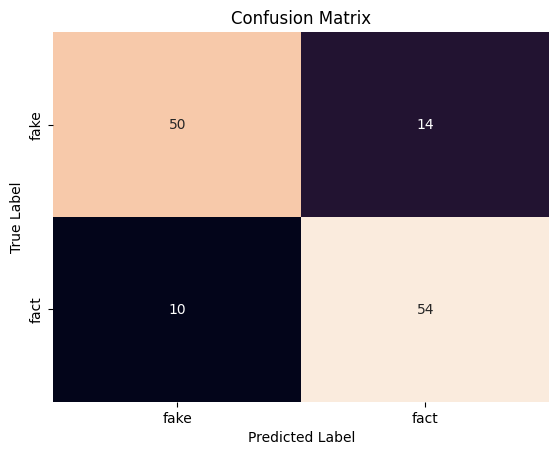

,claim_premise,labels_array,predicted_labels,is_correct,predicted_explanation
72,premise: the product clear sight eye drops end...,fake,fake,True,The premise states that Willie Ong said he and...
73,premise: the product clear sight eye drops end...,fact,fake,False,The premise does not mention Doc Liza Ong ment...
74,"premise: the ad consists of spliced videos, wi...",fake,fake,True,The premise states that the ad consists of spl...
75,"premise: the ad consists of spliced videos, wi...",fact,fact,True,The premise states that the ad consists of spl...
76,premise: while the facebook page public health...,fake,fake,True,"The premise states that the Facebook page ""Pub..."
...,...,...,...,...,...
195,"premise: however, the only ceremonial turnover...",fact,fake,False,The premise states that the only ceremonial tu...
196,premise: the last known visit of us troops to ...,fake,fact,False,The premise mentions the Philippines receiving...
197,premise: the last known visit of us troops to ...,fact,fake,False,The premise states the last known visit of US ...
198,premise: the u.s. navy’s most recent documenta...,fake,fake,True,The premise only mentions a specific visit of ...


In [ ]:
details_of(p_labl, p_expl, labels_array)